In [280]:
%matplotlib inline

In [282]:
import matplotlib.pyplot as plt

In [304]:
import seaborn as sns

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('bestsellers with categories.csv')

In [261]:
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [7]:
df.shape

(550, 7)

In [265]:
df['name'].nunique()

351

In [15]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

### Первинне дослідження даних

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [19]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? (Так / ні)
Ні

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [25]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри?
В таблиці всього 2 жанри Non Fiction та Fiction

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

<Axes: >

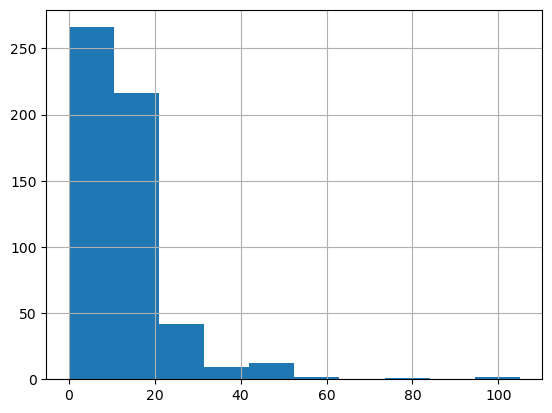

In [384]:
df['price'].hist()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [204]:
df['price'].max()

105

In [206]:
df['price'].min()

0

In [45]:
df['price'].mean()

13.1

In [47]:
df['price'].median()

11.0

Максимальна ціна? 105

Мінімальна ціна? 0

Середня ціна? 13.1

Медіанна ціна? 11

### Пошук та сортування даних

In [63]:
max_rating = df['user_rating'].max()
max_rating

4.9

Який рейтинг у датасеті найвищий? Відповідь: 4.9

In [74]:
num_books_max_rating = df[df['user_rating'] == max_rating].shape[0]
num_books_max_rating

52

Скільки книг мають такий рейтинг? Відповідь: 52

In [118]:
max_reviews = df['reviews'].max()
df.loc[df['reviews'] == max_reviews]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing

In [129]:
books_2015 = df[df['year'] == 2015]
price_max = books_2015['price'].max()
books_2015.loc[books_2015['price'] == price_max]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychologic...	

In [148]:
df[df['year'] == 2010].count()['name']

50

In [150]:
books_fiction_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]
books_fiction_2010.shape[0]

20

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

In [189]:
books_2010_2011 = df[(df['year'] == 2010 | 2011) & (df['user_rating'] == 4.9)]
books_2010_2011.shape[0]

1

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

In [196]:
books_2015_under_8 = books_2015[books_2015['price'] < 8]
sorted_books = books_2015_under_8.sort_values(by='price')
sorted_books.iloc[-1]['name']

'Old School (Diary of a Wimpy Kid #10)'

Яка книга остання у відсортованому списку? Відповідь:
'Old School (Diary of a Wimpy Kid #10)'


### Агрегування даних та з'єднання таблиць

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [214]:
df.groupby('genre')['price'].agg(['min', 'max'])


,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


Максимальна ціна для жанру Fiction: Відповідь 82

Мінімальна ціна для жанру Fiction: Відповідь 0

Максимальна ціна для жанру Non Fiction: Відповідь 105

Мінімальна ціна для жанру Non Fiction: Відповідь 0

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [221]:
author_book_count = df.groupby('author').size().reset_index(name='book_count')
author_book_count

,author,book_count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


In [223]:
author_book_count.shape

(248, 2)

In [225]:
author_book_count.loc[author_book_count['book_count'].idxmax()]

author        Jeff Kinney
book_count             12
Name: 120, dtype: object

Якої розмірності вийшла таблиця? Відповідь: (248, 2)

Який автор має найбільше книг? Відповідь: Jeff Kinney

Скільки книг цього автора? Відповідь: 12

Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [253]:
author_avg_rating = df.groupby('author')['user_rating'].mean().reset_index(name='avg_rating')
author_avg_rating

,author,avg_rating
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


In [267]:
author_avg_rating.loc[author_avg_rating['avg_rating'].idxmin()]

author        Donna Tartt
avg_rating            3.9
Name: 71, dtype: object

 У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt

Який у цього автора середній рейтинг? Відповідь: 3.9

З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [272]:
combined_df = pd.concat([author_book_count.set_index('author'), author_avg_rating.set_index('author')], axis=1)

Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [275]:
combined_df.sort_values(by=['book_count', 'avg_rating'])

,book_count,avg_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


 Який автор перший у списку?: Muriel Barbery	

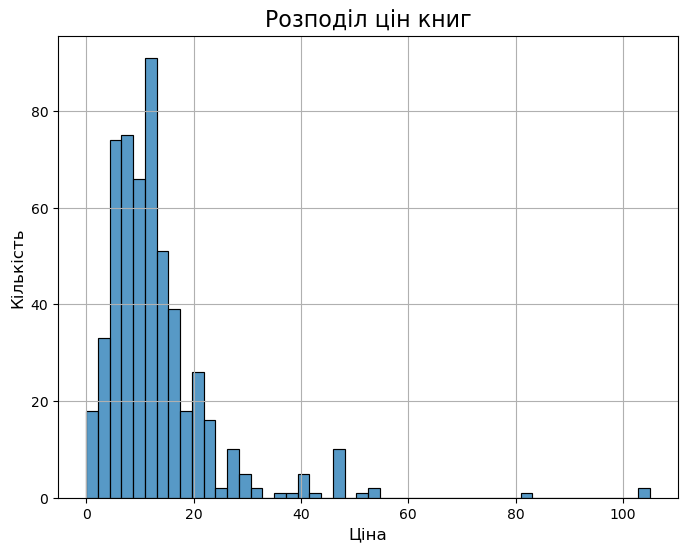

In [364]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'])
plt.title('Розподіл цін книг', fontsize=16)
plt.xlabel('Ціна', fontsize=12)
plt.ylabel('Кількість', fontsize=12)
plt.grid(True)
plt.show()

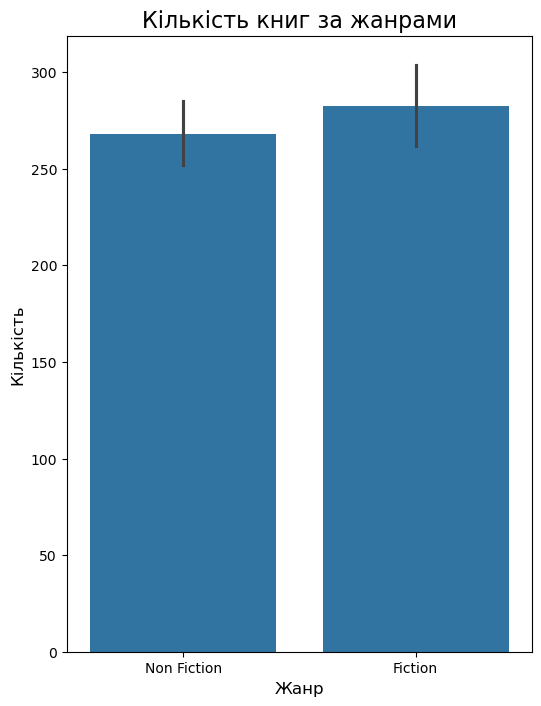

In [346]:
plt.figure(figsize=(6, 8))
sns.barplot(x=df['genre'].values, y=df['genre'].index)
plt.title('Кількість книг за жанрами', fontsize=16)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Кількість', fontsize=12)
plt.show()

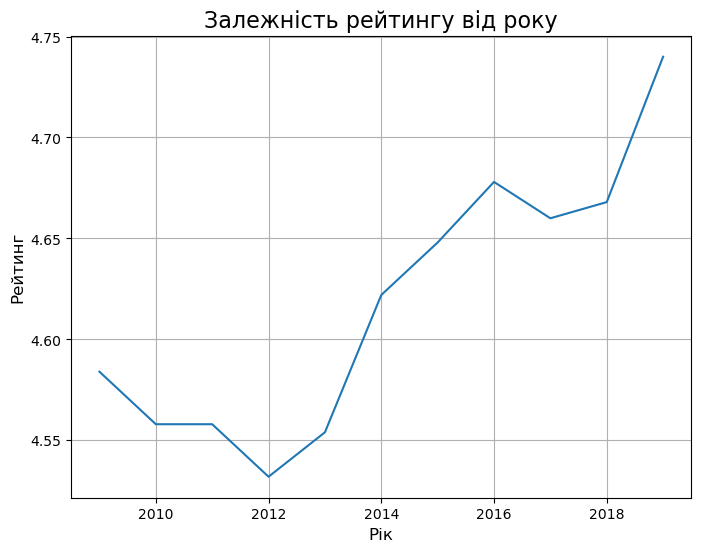

In [362]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='year', y='user_rating', errorbar=None)
plt.title('Залежність рейтингу від року', fontsize=16)
plt.xlabel('Рік', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)
plt.grid(True)
plt.show()